# Chapter 2. Chebyshev Points and Interpolants

Import `numpy` and `matplotlib.pyplot`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## What are the Chebyshev points

Initiate equally spaced angles.

In [2]:
n = 16
tt = np.linspace(0, np.pi, n+1)

Points on the upper half of the unit circle on the complex plane.

In [4]:
zz = np.exp(1j*tt)

The first way to find the Chebyshev points is to extract the real part from the upper half of the unit circle.

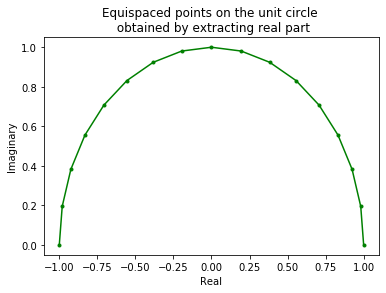

In [5]:
xx1 = zz.real
yy1 = zz.imag

# Plot
plt.figure(num="eq_p_1")
plt.title("Equispaced points on the unit circle \n obtained by extracting real part")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.plot(xx1, yy1, marker='.', color='g')
plt.show()

Another way is to compute $\cos(\theta)$ where $\theta$ is part of the original angles defined.

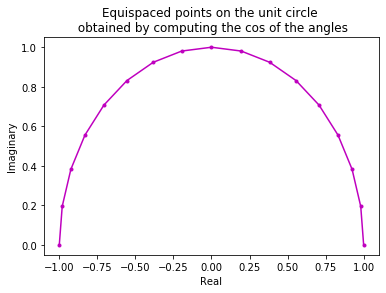

In [6]:
xx2 = np.cos(tt)
yy2 = zz.imag

# Plot
plt.figure(num="eq_p_2")
plt.title("Equispaced points on the unit circle \n obtained by computing the cos of the angles")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.plot(xx2, yy2, marker='.', color='m')
plt.show()

NumPy has also a built in method to find the Chebyshev points of the second kind.

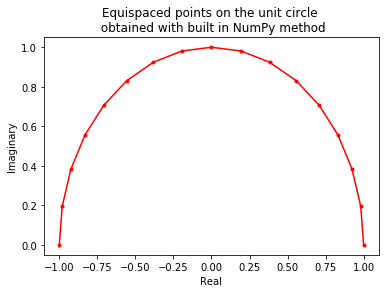

In [8]:
xx3 = np.polynomial.chebyshev.chebpts2(n+1)
yy3 = zz.imag

# Plot
plt.figure(num="eq_p_3")
plt.title("Equispaced points on the unit circle \n obtained with built in NumPy method")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.plot(xx3, yy3, marker='.', color='r')
plt.show()

Note that the Chebyshev points increase in density as it get closer to -1 and 1.
Here we can visualise this.

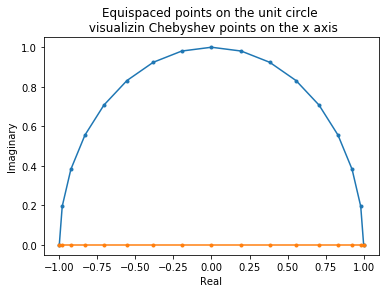

In [11]:
xx4 = zz.real
yy4 = zz.imag

# Plot
plt.figure(num="eq_p_4")
plt.title("Equispaced points on the unit circle \n visualizin Chebyshev points on the x axis")
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.plot(xx4, yy4, marker='.')
plt.plot(xx4, np.zeros_like(xx4), marker='.')
plt.show()

## Chebysev interpolants

Recall that given a set of numbers (data), there exists a unique polynomial $p$ that interpolates these data.
When the interpolation points are the Chebyshev points, we cal the polynomioal a _Chebyshev interpolant_.

### Interpolants for functions

We will define a few functions on the interval $I=[-1,1]$ and then find its Chebyshev interpolant.
For this, let us define a discretisation fo the interval $I$ with 1000 points.
_For the sake of runnign simplicity we define it on the cells we need it_.

First let us study the function $f(x) = sign(x) - \frac{x}{2}$.
Then we find the degree 5 and 25 interpolants coefficients, evaluate the function on $I$, and find the interpolants.
Finally we visualize the results.

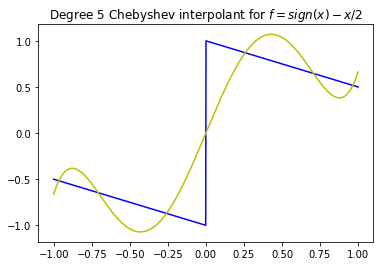

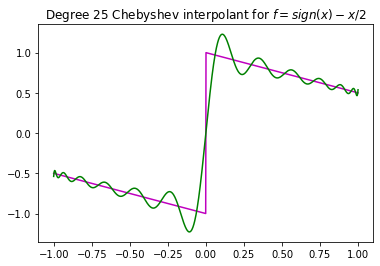

In [17]:
# Defining function
f = lambda x: np.sign(x) - x/2

# Interval I
xx = np.linspace(-1, 1, 1000)

# Find coefficients
interp_f_5 = np.polynomial.chebyshev.chebinterpolate(f, 5)
interp_f_25 = np.polynomial.chebyshev.chebinterpolate(f, 25)
# Evaluate functions
f_eval = f(xx)
# Evaluate interpolants
cheb_eval_f_5 = np.polynomial.chebyshev.chebval(xx, interp_f_5)
cheb_eval_f_25 = np.polynomial.chebyshev.chebval(xx, interp_f_25)

# Visualisation of f and its degree 5 interpolant
plt.figure(num="interp_1")
plt.title(r"Degree 5 Chebyshev interpolant for $f = sign(x) - x/2$")
plt.plot(xx, f_eval, color='b')
plt.plot(xx, cheb_eval_f_5, color='y')
plt.show()

# Visualisation of f and its degree 25 interpolant
plt.figure(num="interp_2")
plt.title(r"Degree 25 Chebyshev interpolant for $f = sign(x) - x/2$")
plt.plot(xx, f_eval, color='m')
plt.plot(xx, cheb_eval_f_25, color='g')
plt.show()

Note that we are actually able to approximate the function with a certain degree of accuracy, and as we increase the degree of the interpolant the accuracy increases.

Now let us study a more complicated function $g(x) = \sin(6x) + sign(\sin(x + e^{2x}))$ and we will find its degree 100 interpolant.
Note that even a more complicated function we can approximate it as long as we have an interpolant with a high enough degree.

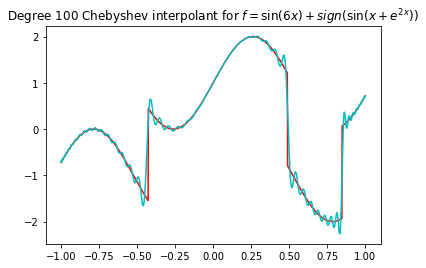

In [18]:
# Defining function
g = lambda x: np.sin(6*x) + np.sign(np.sin(x + np.exp(2*x)))

# Interval I
xx = np.linspace(-1, 1, 1000)

# Interpolant coefficients
interp_g_100 = np.polynomial.chebyshev.chebinterpolate(g, 100)
# Function evaluation
g_eval = g(xx)
# Evaluate the interpolants
cheb_eval_g_100 = np.polynomial.chebyshev.chebval(xx, interp_g_100)

# Visualisation of g and its degree 100 interpolant
plt.figure(num="interp_3")
plt.title(r"Degree 100 Chebyshev interpolant for $f = \sin(6x) + sign(\sin(x + e^{2x}))$")
plt.plot(xx, g_eval, color='r')
plt.plot(xx, cheb_eval_g_100, color='c')
plt.show()

### Interpolant for random data

Finally, instead of a function to sample we can give it a sample of random data, and again, we are able to approximate it with a polynomial.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\polynomial\chebyshev.py:1647: RankWarning: The fit may be poorly conditioned
  return pu._fit(chebvander, x, y, deg, rcond, full, w)


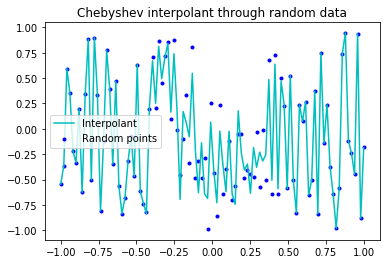

In [19]:
# Random data
rng = np.random.default_rng(12345) # The seed is to make it reproducible
rn_data = 2*rng.uniform(size=100) - 1
x2 = np.linspace(start=-1, stop=1, num=100)
# Fit Chebyshev interpolant
cheb_coeff_random = np.polynomial.chebyshev.chebfit(x=x2, y=rn_data, deg=100)
# Evaluate the interpolant
cheb_fit_random = np.polynomial.chebyshev.chebval(x2, cheb_coeff_random)

# Plot
plt.figure(num="interp_4")
plt.title("Chebyshev interpolant through random data")
plt.scatter(x2, rn_data, color='b', marker='.', label='Random points')
plt.plot(x2, cheb_fit_random, color='c', label='Interpolant')
plt.legend()
plt.show()